In [1]:
import matplotlib.pyplot as plt
from Functions.connection.connection import *
from Functions.Models.Logistic_regression import *
from Functions.Models.Random_forest import *
from Functions.Models.xgboost import *
from Functions.Models.evaluation import *
from Functions.Pipelines.pipeline_NLP import *

2023-05-27 14:00:50.293569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 14:00:50.968928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
alertP1=connection("credentials.csv")
#alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")


Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
471


/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
data = pre_process(alertP1)

/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
/home/marouankamoun/Desktop/PBL-HGO/Functions/AlertP1/data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [4]:
data

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,HOSP,UCSP,USF A,USF B,outro,not accepted before,clean_text,topic_0,topic_1,topic_2
630,EGBZZB,VLNMEEM,LOHHHSHT,SSDBHEA,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,0,...,0,0,1,0,0,1,doente ano idade tremor acentuar membro alto ...,0.013366,0.013126,0.973508
1537,FGSEDD,MIVCNDB,LOHHLSTU,,0,,OUTRA,,unknown,7,...,0,0,0,0,0,1,relatorio clinico,0.111212,0.112742,0.776047
985,BSEZF,LLCBVJI,LOHHLTRS,SCCABHA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,53,...,0,0,0,1,0,1,trazer inumero relatorio ida hgo-su vulvo-vagi...,0.008555,0.008644,0.982801
1103,ESSSBD,LLDDNEN,LOHHLTSH,SCCBZCA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,0,...,0,0,0,1,0,1,tremor fino ambos mão bocar desde mês deixar ...,0.023198,0.021009,0.955793
752,DECZCS,VLEVCVE,LOHHLTOU,SCCDEGG,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,0,0,1,0,1,pé pendente instalação mês atrofiar muscular...,0.497660,0.027440,0.474900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,2,Prioritário,0,...,0,1,0,0,0,1,doente desde disfagia sólido ser consultar co...,0.104516,0.116062,0.779421
1335,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,3,Normal,0,...,0,0,0,1,0,1,sra ano seguir psiquiatrio doença bipolar lon...,0.009737,0.057328,0.932935
1177,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,3,Normal,0,...,0,1,0,0,0,0,a sequela parto anoxia cerebral seguir inicial...,0.008625,0.167494,0.823882
1332,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,,unknown,7,...,0,0,0,1,0,1,doente episódio frequente desorientação espaci...,0.345901,0.221726,0.432373


# Logistic Regression

In [5]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, coefficients, X_train, X_test, y_train, y_test = log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: too many values to unpack (expected 7)

In [10]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.28,0.77,0.99,0.76,0.83
1,Cohen's Kappa,0.59,0.75,0.81,0.83,0.89


In [11]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.28,0.66,1.00,0.66,0.67
1,Cohen's Kappa,0.59,0.71,0.83,0.75,0.76


# XGBOOST

In [5]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

In [6]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.49,0.79,0.98,0.78,0.88
1,Cohen's Kappa,0.61,0.78,0.84,0.84,0.90


In [7]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.49,0.68,0.96,0.68,0.68
1,Cohen's Kappa,0.61,0.70,0.82,0.75,0.75


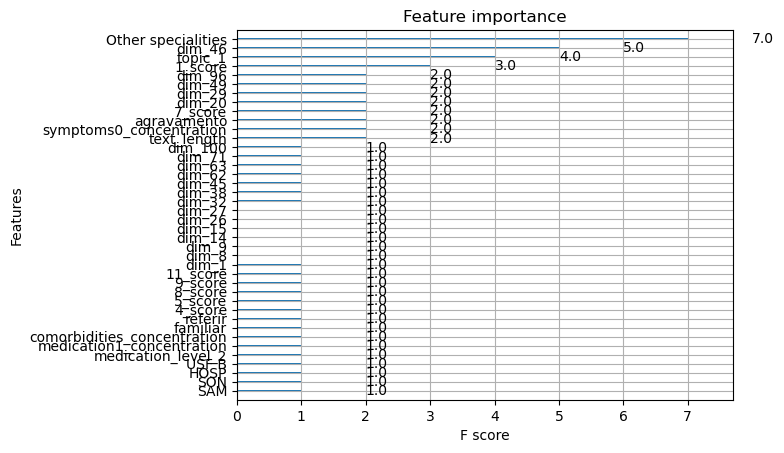

In [8]:
from xgboost import plot_importance

# Plot the feature importance scores
plot_importance(model_score)
plt.show()

# Random Forest

In [12]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, coefficients, X_train, X_test, y_train, y_test = random_forest(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df.sort_values(by='coefficients',ascending=False)

,Feature,coefficients
82,dim_69,0.028923
111,dim_98,0.025479
0,text_length,0.024890
22,dim_9,0.023716
98,dim_85,0.019937
...,...,...
8,HOSP,0.001499
9,UCSP,0.001257
10,USF A,0.000866
7,3+,0.000408


In [13]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.44,0.99,0.99,1.0,0.99
1,Cohen's Kappa,0.49,0.99,0.99,1.0,1.00


In [14]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.44,0.67,0.98,0.67,0.68
1,Cohen's Kappa,0.49,0.66,0.95,0.67,0.69


In [9]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns

In [34]:
non_Nlp=features[0:14]
caveman_features=features[14:36]
LDA_features=features[36:39]
chi_squared_features=features[39:110]
bertfeatures=features[110:124]
Word2vec_features=features[124:]

from itertools import compress, product
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
  #This fonctions will be used to have every combinations of features for the model
def combinations(items):
      return ( list(set(compress(items,mask))) for mask in product(*[[0,1]]*len(items)) )

In [4]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
 

In [5]:
non_Nlp=features[0:14]
caveman_features=features[14:36]
LDA_features=features[36:39]
chi_squared_features=features[39:110]
bertfeatures=features[110:124]
Word2vec_features=features[124:]

from itertools import compress, product
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
  #This fonctions will be used to have every combinations of features for the model
def combinations(items):
      return ( list(set(compress(items,mask))) for mask in product(*[[0,1]]*len(items)) )


def lgbm(all_columns,y):
      new_x=X[all_columns]
      y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(new_x,y)
      thresholds = np.linspace(0, 1, 100)
       # Cohen's Kappa
      kappas = [cohen_kappa_score(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
      kappa_threshold = thresholds[np.argmax(kappas)]
      kappa_y_pred_binary = (y_pred_test >= kappa_threshold).astype(int)
      kappa_recall = recall_score(y_test, kappa_y_pred_binary)
      kappa_precision = precision_score(y_test, kappa_y_pred_binary)
      return(round(kappa_recall, 2),round(kappa_precision, 2))

d = pd.DataFrame(columns=["Features_used","recall","precision"])

all_columns = [non_Nlp,caveman_features,LDA_features,chi_squared_features,bertfeatures,Word2vec_features]
  #Iterate over every combinations of features and train the model,
  #get the MAE and append it with the features used in the dataframe
combi_col = list(combinations(np.arange(start=0, stop=len(all_columns))))[1:] #starting from index 1 to drop empty list
group_names = ['non_Nlp', 'caveman_features', 'LDA_features', 'chi_squared_features', 'bertfeatures', 'Word2vec_features']

for columns in combi_col:
    selected_columns_group = [group_names[i] for i in columns]
    selected_columns = [all_columns[i] for i in columns]
    flattened_columns = [col for sublist in selected_columns for col in sublist]  # Flatten the list
    recall,precision = lgbm(flattened_columns, y)
    d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)

d['Rank'] = d['recall'].rank(ascending=0).astype(int)
d = d.sort_values(["recall"], ascending=False)
d = d[["Rank", "Features_used", "recall","precision"]]

/tmp/ipykernel_3851580/1905216700.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3851580/1905216700.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3851580/1905216700.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d.append({"Features_used": ",".join(selected_columns_group), "recall": recall,"precision": precision}, ignore_index=True)
/tmp/ipykernel_3851580/1905216700.py:41: FutureWarning: The frame.append method is deprecated 

In [7]:
# Save the dataframe to a CSV file
d.to_csv('results.csv', index=False)

In [6]:
d

,Rank,Features_used,recall,precision
27,1,"caveman_features,LDA_features,chi_squared_feat...",0.95,0.69
11,2,"LDA_features,chi_squared_features",0.94,0.68
13,2,"LDA_features,chi_squared_features,bertfeatures",0.94,0.68
23,4,"caveman_features,LDA_features",0.93,0.69
59,5,"non_Nlp,caveman_features,LDA_features,chi_squa...",0.92,0.72
...,...,...,...,...
62,60,"non_Nlp,caveman_features,LDA_features,chi_squa...",0.80,0.76
54,60,"non_Nlp,caveman_features,chi_squared_features,...",0.80,0.76
16,60,"caveman_features,Word2vec_features",0.80,0.74
3,62,chi_squared_features,0.79,0.72
